In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
data  = pd.read_csv(r"C:\Users\rarna\Downloads\4d974-retail\retail_price.csv")
print(data.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

check for NULL values in the data

In [7]:
print(data.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


Descriptive statistics of the data

In [9]:
print(data.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

Distribution price of the products

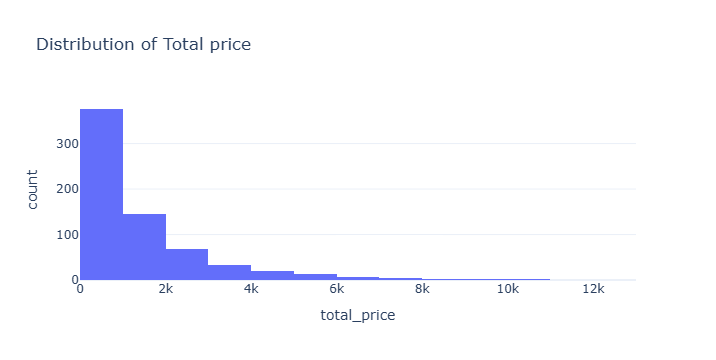

In [14]:
fig = px.histogram(data,
                  x='total_price',
                  nbins=20,
                  title='Distribution of Total price')
fig.show()

Distribution of the unit price using box plot

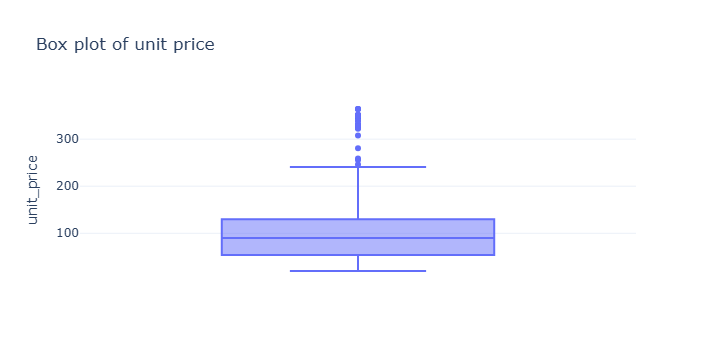

In [18]:
fig = px.box(data,
             y='unit_price',
             title='Box plot of unit price')
fig.show()

Relationship between qualtity and total prices using scatter plot

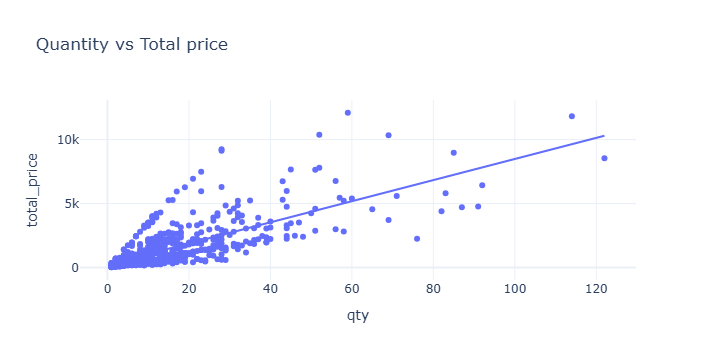

In [24]:
fig = px.scatter(data,
                x='qty',
                y='total_price',
                title='Quantity vs Total price',trendline='ols')
fig.show()

NOTE: scatter shows that the relationship between quantity and total prices is linear, that means that the price structure is based on a fixed unit price,where the total price is calculated by multiplying the quantity by the unit price.

Average total prices by product categories

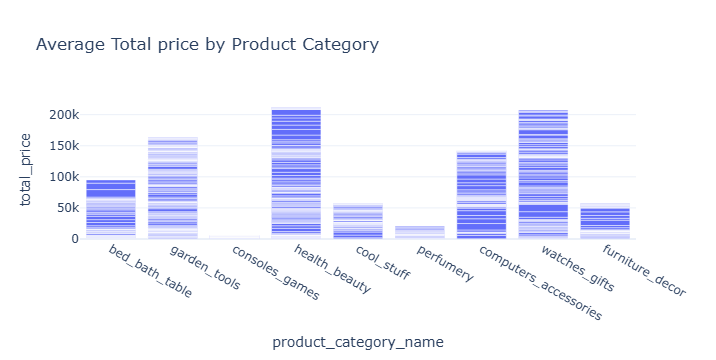

In [33]:
fig = px.bar(data, x='product_category_name',
            y='total_price',
            title='Average Total price by Product Category')
fig.show()

Distribution of total price by weekday using a box plot

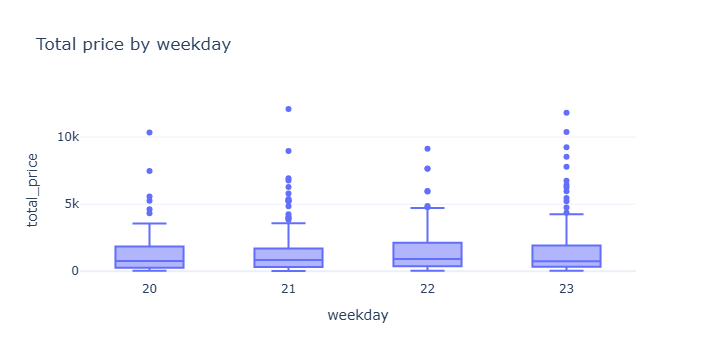

In [35]:
fig = px.box(data, x='weekday',
            y='total_price',
            title='Total price by weekday')
fig.show()

Distribution of total price by holiday using a box plot

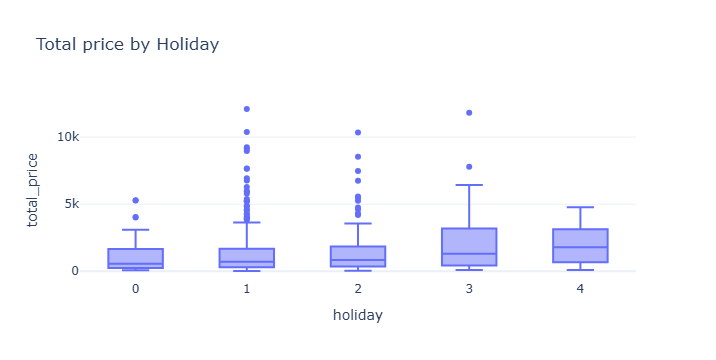

In [37]:
fig = px.box(data, x='holiday',
            y='total_price',
            title='Total price by Holiday')
fig.show()

Correlation between the numerical features with each other

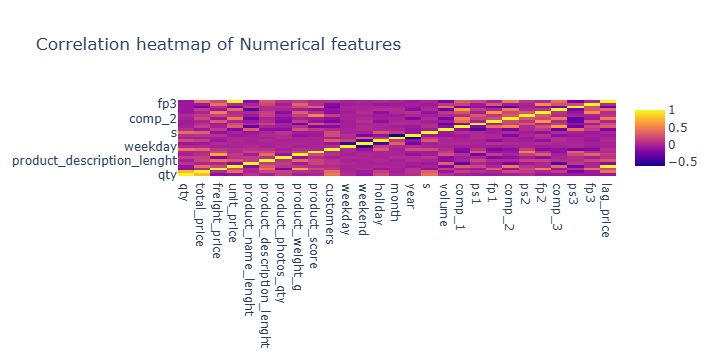

In [45]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

fig = go.Figure(go.Heatmap(x = correlation_matrix.columns,
                           y = correlation_matrix.columns,
                           z = correlation_matrix.values))
fig.update_layout(title = 'Correlation heatmap of Numerical features')
fig.show()

Analyzing competitors’ pricing strategies is essential in optimizing retail prices. Monitoring and benchmarking against competitors’ prices can help identify opportunities to price competitively, either by pricing below or above the competition, depending on the retailer’s positioning and strategy. Now let’s calculate the average competitor price difference by product category

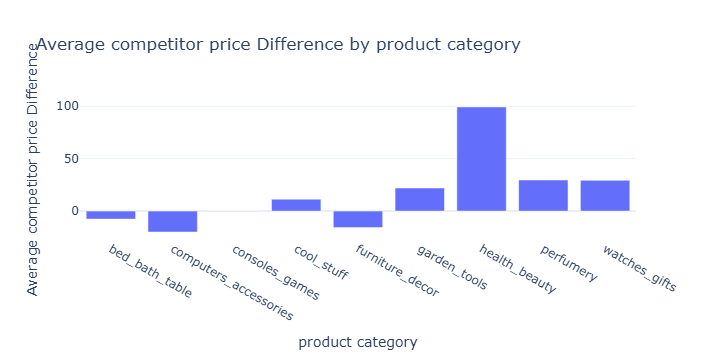

In [47]:
data['comp_price_diff'] = data['unit_price']- data['comp_1']
avg_price_diff_by_category = data.groupby('product_category_name')['comp_price_diff'].mean().reset_index()
fig = px.bar(avg_price_diff_by_category,
            x='product_category_name',
            y='comp_price_diff',
            title='Average competitor price Difference by product category')
fig.update_layout(
    xaxis_title = 'product category',
    yaxis_title = 'Average competitor price Difference'
    
)
fig.show()

Retail Price Optimization with Machine learning

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
x = data[['qty','unit_price','comp_1',
         'product_score','comp_price_diff']]
y = data['total_price']
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()


Making predictions and having a look at the predicted retail prices and the actual retail prices

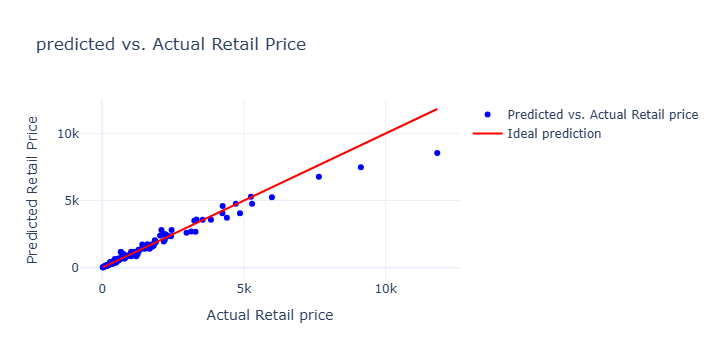

In [63]:
y_pred = model.predict(x_test)
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test,y=y_pred,mode='markers',
                        marker=dict(color='blue'),
                        name='Predicted vs. Actual Retail price'))
_
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test),max(y_test)],
                        mode='lines',
                        marker=dict(color='red'),
                        name='Ideal prediction'))
fig.update_layout(
    title = 'predicted vs. Actual Retail Price',
    xaxis_title = 'Actual Retail price',
    yaxis_title = 'Predicted Retail Price'
)

fig.show()

The ultimate aim of optimizing retail prices is to charge a price that helps you make the most money and attracts enough customers to buy your products. It involves using data and pricing strategies to find the right price that maximizes your sales and profits while keeping customers happy. I hope you liked this article on optimizing retail prices with Machine Learning using Python.